In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [0]:
iris = load_iris()

In [0]:
iris.data[0:10]

In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [0]:
target_label = {x:i for x,i in enumerate(iris.target_names)}
iris_df['target'] = [target_label[i] for i in iris.target]

In [0]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
random_training_index = np.random.choice(iris_df.index,size = int(len(iris_df)*0.8),replace=False)

In [0]:
train_data = iris_df.loc[iris_df.index.isin(random_training_index),:].copy().reset_index(drop=True)
test_data = iris_df.loc[~iris_df.index.isin(random_training_index),:].copy().reset_index(drop=True)

In [0]:
train_data.shape,test_data.shape

((120, 5), (30, 5))

In [0]:
train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
train_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.815833,3.037500,3.730833,1.164167
std,0.838866,0.418091,1.771995,0.751111
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.575000,0.275000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
train_data.target.value_counts()

versicolor    42
setosa        41
virginica     37
Name: target, dtype: int64

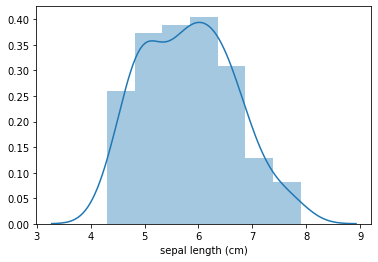

In [0]:
sns.distplot(train_data['sepal length (cm)'])

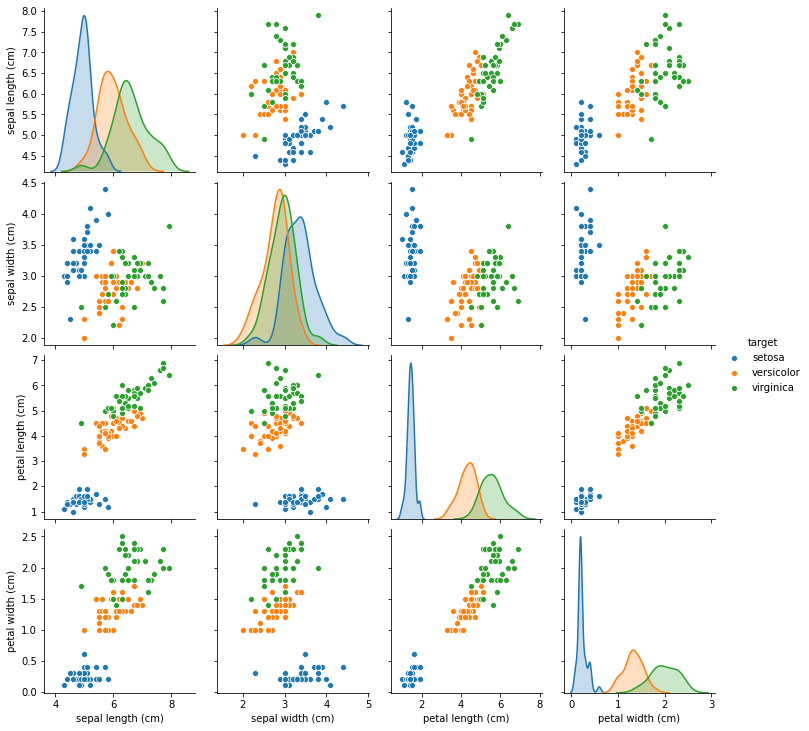

In [0]:
sns.pairplot(train_data, hue="target")

In [0]:
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]

In [0]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

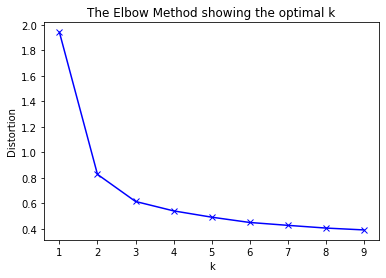

In [0]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
kmeanModel = KMeans(n_clusters=3, init="random", n_jobs=-1)
kmeanModel.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=-1, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [0]:
test_data["Y_"] = kmeanModel.predict(test_data.iloc[:,:-1])

In [0]:
test_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Y_
0,5.4,3.7,1.5,0.2,setosa,0
1,5.4,3.9,1.3,0.4,setosa,0
2,5.1,3.5,1.4,0.3,setosa,0
3,5.7,3.8,1.7,0.3,setosa,0
4,5.1,3.3,1.7,0.5,setosa,0


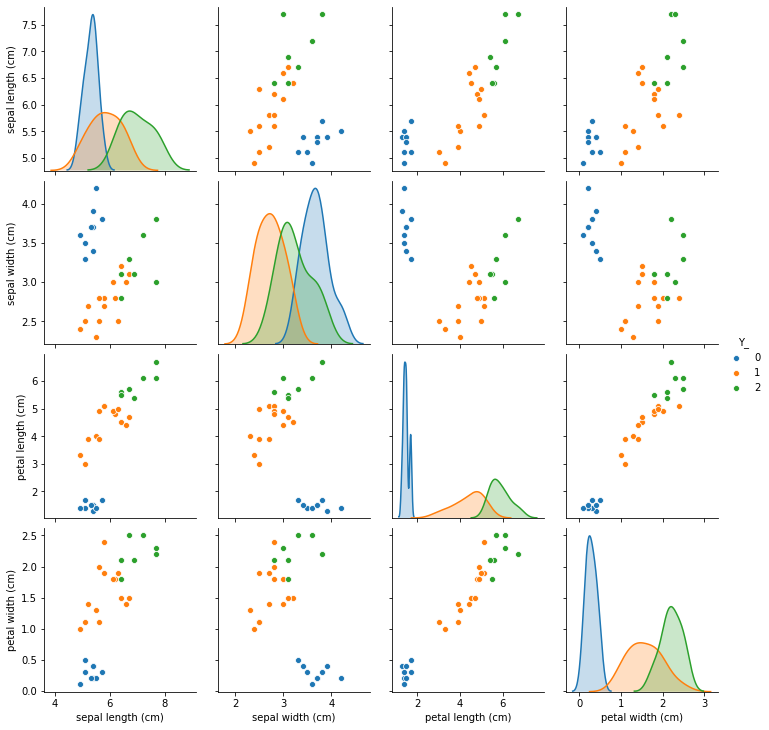

In [0]:
sns.pairplot(test_data, hue="Y_")

In [0]:
test_data = pd.concat([test_data,pd.get_dummies(test_data["Y_"],prefix="Y")],axis=1)

In [0]:
confusion_matrix = test_data.groupby('target',as_index=False).agg({"Y_0":"sum","Y_1":"sum","Y_2":"sum"})
confusion_matrix

,target,Y_0,Y_1,Y_2
0,setosa,9,0,0
1,versicolor,0,8,0
2,virginica,0,6,7


In [0]:
confusion_matrix.iloc[:,1:].values

array([[9, 0, 0],
       [0, 8, 0],
       [0, 6, 7]], dtype=uint8)

In [0]:
print("TEST DATA ACCURACY IS :")
print(np.mean(np.diag(confusion_matrix.iloc[:,1:].values)/np.sum(confusion_matrix.iloc[:,1:].values,axis=0)))

TEST DATA ACCURACY IS :
0.8571428571428571
